## **Deep Learning Model**

#### This block of code is for importing all the required libraries for the project

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras

Image DataGenerator: It generates batches of tensor image data with real-time data augmentation.m

In [2]:
from keras.preprocessing.image import ImageDataGenerator

Importing the Dataset
The dataset is organised in directories in the following fashion:
-Train
    -- WithMask
        --- (images)
    -- WithoutMask
        --- (images)
-Test
    -- WithMask
        --- (images)
    -- WithoutMask
         --- (images) 
-Validation
    -- WithMask
        --- (images)
    -- WithoutMask
         --- (images)

Storing the paths for the dataset in seperate variables

In [3]:
train_dir = r'./Face Mask Dataset/Train'
test_dir = r'./Face Mask Dataset/Test'
val_dir = r'./Face Mask Dataset/Validation'

Here we are creating 3 instance variables of ImageDataGenerator,one for training ,one for testing and one for validation

In [4]:
train_data_generator = ImageDataGenerator(rescale = 1./255,
                                          rotation_range=40,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          horizontal_flip = True ,
                                          zoom_range=0.2,
                                          shear_range=0.3)
val_data_generator = ImageDataGenerator(rescale = 1./255,
                                        rotation_range=30,
                                        width_shift_range=0.1,
                                        height_shift_range=0.24, 
                                        horizontal_flip = True ,
                                        zoom_range=0.25,
                                        shear_range=0.4)
test_set_generator = ImageDataGenerator(rescale = 1./255)

We are pulling out the images from the directory and applying augmention, resizing to the images

In [5]:
train_set = train_data_generator.flow_from_directory(train_dir,
                                                     target_size=(150,150),
                                                     batch_size=20,
                                                     class_mode="binary",
                                                     shuffle=False)


val_set = val_data_generator.flow_from_directory(val_dir,
                                                 target_size=(150,150),
                                                 batch_size=20,
                                                 class_mode="binary")


test_set = test_set_generator.flow_from_directory(test_dir, 
                                                  target_size=(150,150),
                                                  batch_size=20,
                                                  class_mode="binary")

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [6]:
print (len(train_set))

500


In [7]:
print (len(train_set[0]))

2


In [8]:
print (len(train_set[0][0]))

20


In [9]:
print (len(train_set[0][0][0]))

150


In [10]:
print (len(train_set[0][0][0][0]))

150


In [11]:
print (len(train_set[0][0][0][0][0]))

3


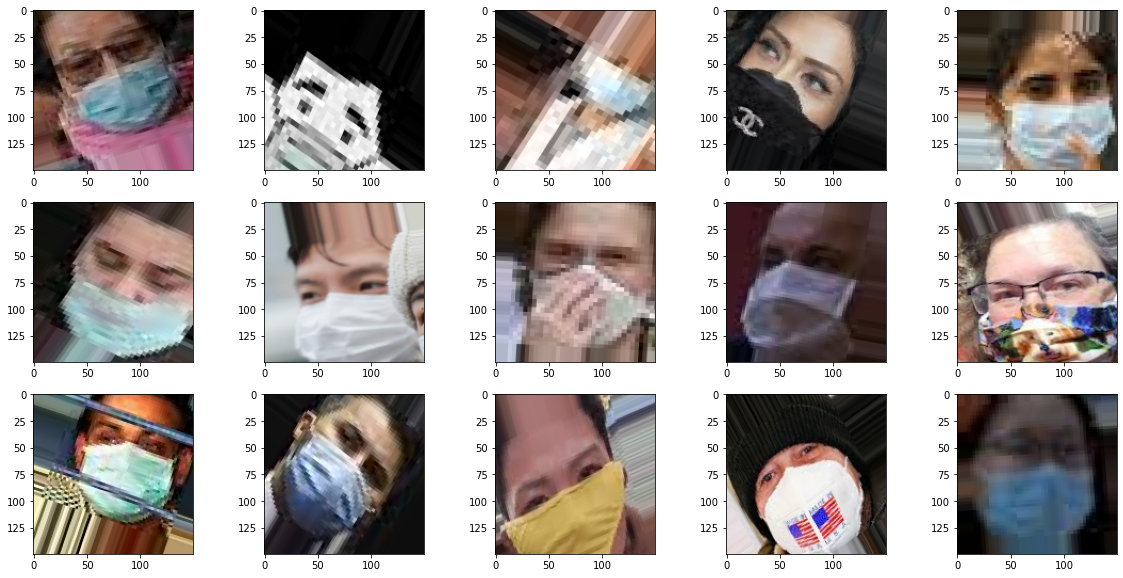

In [12]:
plt.figure(figsize=(20,10)) # specifying the overall grid size

for i in range(15):
    plt.subplot(3,5,i+1)
    x = train_set[i][0][3]
    plt.imshow(x)

plt.show()

In [60]:
a = ImageDataGenerator(rescale = 1./255,).flow_from_directory(train_dir,
                                                     target_size=(150,150),
                                                     batch_size=20,
                                                     class_mode="binary",shuffle=False)

Found 10000 images belonging to 2 classes.


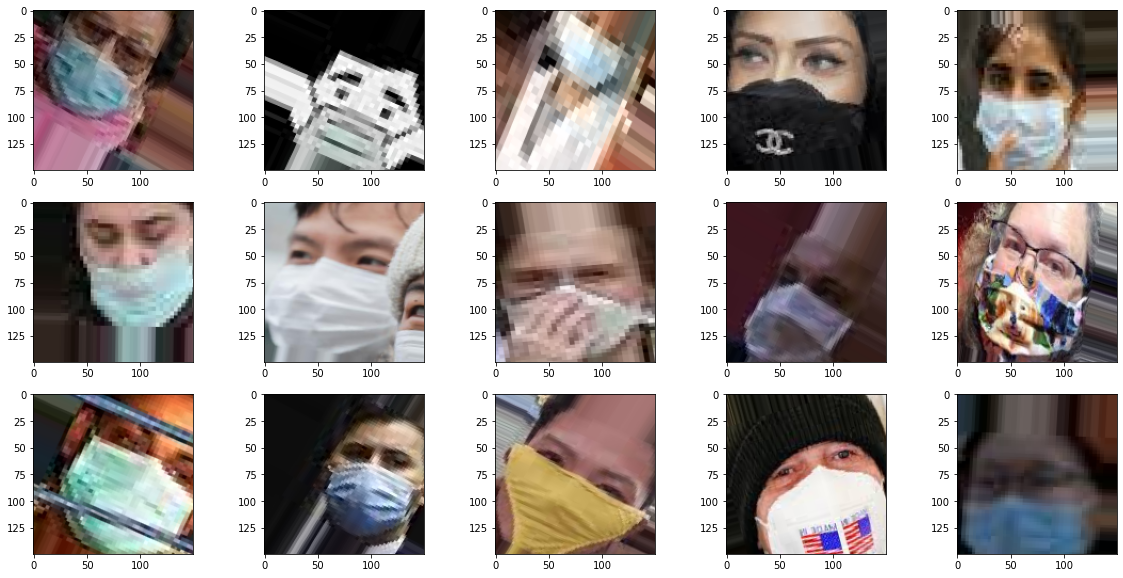

In [71]:
plt.figure(figsize=(20,10)) # specifying the overall grid size

for i in range(15):
    plt.subplot(3,5,i+1)
    x = train_set[i][0][3]
    plt.imshow(x)

plt.show()

###  Building aur model by creation of an instance of Sequential Model provided by Keras

Creating a Model Variable which is an instance of a Sequential Model provided by keras

In [6]:
model = keras.models.Sequential()

Adding Layers to the model

In [7]:
model.add(keras.layers.Conv2D(32,(3,3),input_shape = (150,150,3),activation="relu"))
model.add(keras.layers.MaxPool2D((2,2)))
model.add(keras.layers.Conv2D(64,(3,3),activation="relu"))
model.add(keras.layers.MaxPool2D((2,2)))
model.add(keras.layers.Conv2D(128,(3,3),activation="relu"))
model.add(keras.layers.MaxPool2D((2,2)))
model.add(keras.layers.Conv2D(128,(3,3),activation="relu"))
model.add(keras.layers.MaxPool2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation="relu"))
model.add(keras.layers.Dense(1,activation="sigmoid"))

Parameters to various layers are
##### Conv2D
1. Number of filters in the layer
2. Kernel Size : The dimension of each filter
3. Input Shape : It tells the model about the incoming data
4. activation : It is the activation function

##### MaxPool2D
1. Pool Size: Dimesions of the pooling window


##### Dense
1. Number of units in layer
2. activation : It is the activation function

Summary of our model

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

Model Compilation Information

In [10]:
model.compile(loss = "binary_crossentropy", 
              optimizer = keras.optimizers.RMSprop(learning_rate=2e-4),
              metrics=['acc'])

In [11]:
model_history= model.fit(train_set,steps_per_epoch=500,epochs=20,validation_data=val_set)

Epoch 1/20
500/500 [==============================] - 251s 502ms/step - loss: 0.3776 - acc: 0.8383 - val_loss: 0.2464 - val_acc: 0.9125
Epoch 2/20
500/500 [==============================] - 241s 481ms/step - loss: 0.2457 - acc: 0.9105 - val_loss: 0.2008 - val_acc: 0.9325
Epoch 3/20
500/500 [==============================] - 247s 494ms/step - loss: 0.2121 - acc: 0.9225 - val_loss: 0.1631 - val_acc: 0.9350
Epoch 4/20
500/500 [==============================] - 245s 491ms/step - loss: 0.1942 - acc: 0.9322 - val_loss: 0.1814 - val_acc: 0.9375
Epoch 5/20
500/500 [==============================] - 252s 504ms/step - loss: 0.1791 - acc: 0.9400 - val_loss: 0.1421 - val_acc: 0.9588
Epoch 6/20
500/500 [==============================] - 248s 495ms/step - loss: 0.1711 - acc: 0.9420 - val_loss: 0.1420 - val_acc: 0.9563
Epoch 7/20
500/500 [==============================] - 245s 490ms/step - loss: 0.1683 - acc: 0.9433 - val_loss: 0.1413 - val_acc: 0.9538
Epoch 8/20
500/500 [============================

#### Model Training completed with accuracy on train dataset : 97.30% and on validation 98%
Now looking at the graph

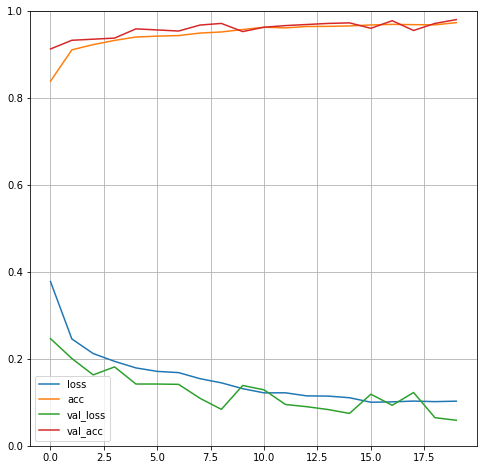

In [13]:
pd.DataFrame(model_history.history).plot(figsize=(8,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [14]:
model.save("final_model.h5")

In [16]:
model.evaluate(test_set)

50/50 [==============================] - 4s 84ms/step - loss: 0.0346 - acc: 0.9879


[0.034557417035102844, 0.9879032373428345]

In [14]:
model = keras.models.load_model("final_model.h5")

In [16]:
res = model.evaluate(test_set)
print("Loss : ",res[0])
print("Accuracy : ",res[1]*100)

50/50 [==============================] - 5s 100ms/step - loss: 0.0346 - acc: 0.9879
Loss :  0.034557417035102844
Accuracy :  98.79032373428345


In [57]:
def result (x):
    if x < 0.5:
        return "Face Mask Found"
    else :
        return "No Face Mask Present"

Enter a Number from (0-49) : 29
Face Mask Found


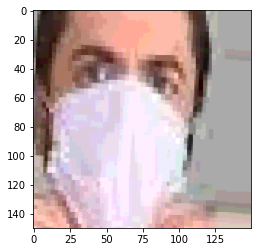

In [68]:
i = int(input("Enter a Number from (0-49) : "))
print(result(model.predict(np.array([test_set[i][0][0]]))))
plt.imshow(np.array(test_set[i][0][0]))
plt.show()

In [115]:
img = keras.preprocessing.image.load_img("WOmask.jpg")

In [116]:
img_arr = keras.preprocessing.image.img_to_array(img)
print(img_arr.shape)

(720, 1280, 3)


In [117]:
a = img_arr.reshape?

In [ ]:
a = img_arr.reshape

In [118]:
abc = tf.image.resize(img_arr,(150,150))

In [119]:
abc = np.array(abc)

In [120]:
abc = abc/255.

In [121]:
abc.shape

(150, 150, 3)

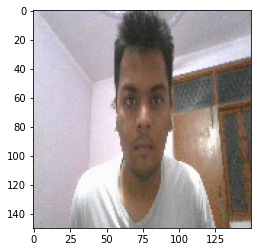

In [122]:
plt.imshow(abc)

In [123]:
result(model.predict(np.array([abc])))

'Face Mask Found'

In [106]:
img2 = keras.preprocessing.image.load_img("Wmask.jpg")

In [107]:
img_arr = keras.preprocessing.image.img_to_array(img2)
print(img_arr.shape)

(720, 1280, 3)


In [108]:
abc = tf.image.resize(img_arr,(150,150))

In [109]:
abc = np.array(abc)

In [110]:
abc = abc/255.

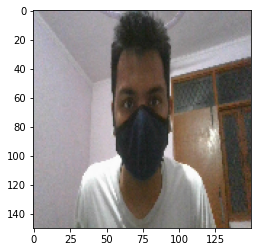

In [111]:
plt.imshow(abc)

In [114]:
result(model.predict(np.array([abc])))

'Face Mask Found'